In [1]:
import pandas as pd
import numpy as np

In [8]:
df = pd.read_csv('da_mall_customer.csv')
df.head()

,CustomerID,Gender,Age,Education,Marital Status,Annual Income (k$),Spending Score (1-100)
0,1,M,19,High School,Married,15,39
1,2,M,21,Graduate,Single,15,81
2,3,F,20,Graduate,Married,16,6
3,4,F,23,High School,Unknown,16,77
4,5,F,31,Uneducated,Married,17,40


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
# Clean column names by stripping leading and trailing whitespace
df.columns = df.columns.str.strip()

In [11]:
# Standardize "Unknown" entries for cleaner visuals
df['Education'] = df['Education'].replace('Unknown', 'Not Specified')
df['Marital Status'] = df['Marital Status'].replace('Unknown', 'Not Specified')

C:\Users\Diluksha Shamal\AppData\Local\Temp\ipykernel_4104\3070484001.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Gender', palette='viridis', ax=ax_gender)


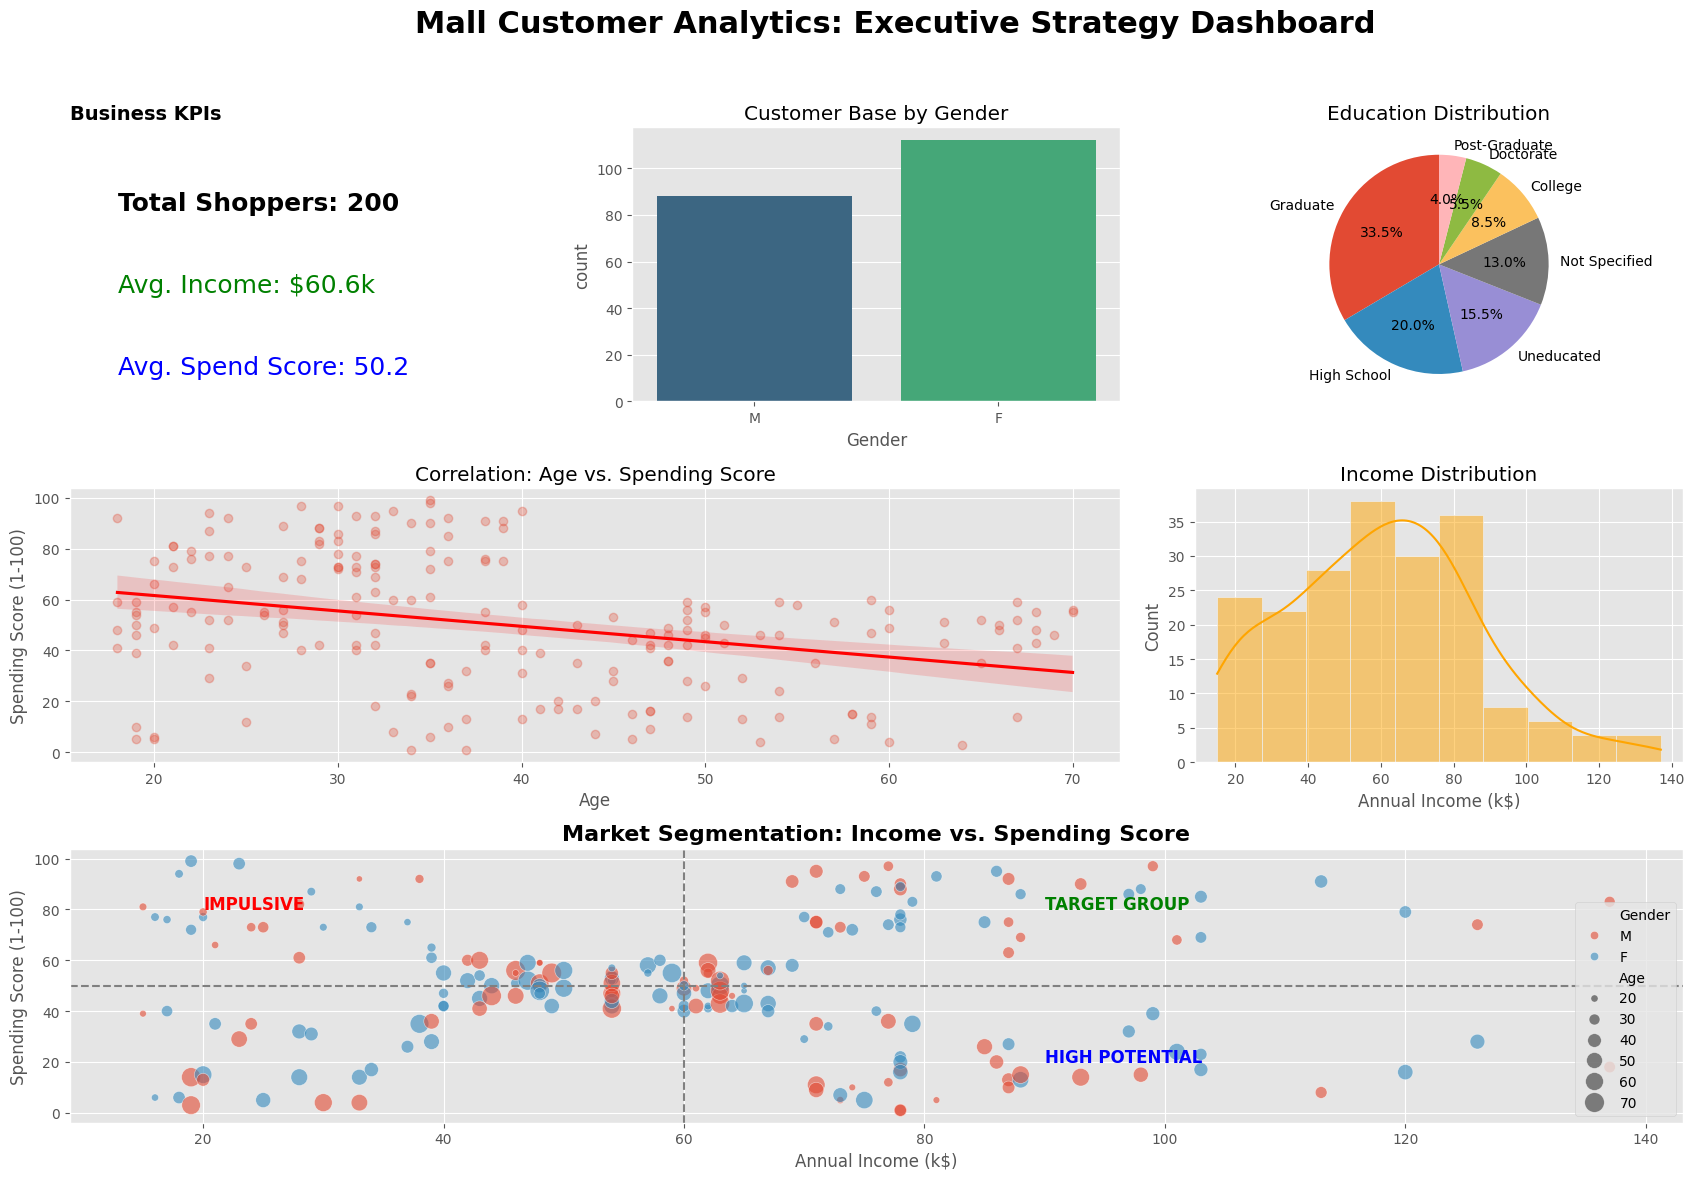

In [12]:
# Create a large figure with a 3x3 grid system
fig = plt.figure(figsize=(18, 12))
plt.style.use('ggplot') 
gs = fig.add_gridspec(3, 3)

# Main Title
fig.suptitle('Mall Customer Analytics: Executive Strategy Dashboard', 
             fontsize=22, fontweight='bold', y=0.98)

# 1. KPI Panel (Top Left)
ax_kpi = fig.add_subplot(gs[0, 0])
ax_kpi.axis('off')
total_cust = len(df)
avg_inc = df['Annual Income (k$)'].mean()
avg_spend = df['Spending Score (1-100)'].mean()

ax_kpi.text(0.1, 0.7, f"Total Shoppers: {total_cust}", fontsize=18, fontweight='bold')
ax_kpi.text(0.1, 0.4, f"Avg. Income: ${avg_inc:.1f}k", fontsize=18, color='green')
ax_kpi.text(0.1, 0.1, f"Avg. Spend Score: {avg_spend:.1f}", fontsize=18, color='blue')
ax_kpi.set_title('Business KPIs', loc='left', fontsize=14, fontweight='bold')

# 2. Gender Mix (Top Center)
ax_gender = fig.add_subplot(gs[0, 1])
sns.countplot(data=df, x='Gender', palette='viridis', ax=ax_gender)
ax_gender.set_title('Customer Base by Gender')

# 3. Education Breakdown (Top Right)
ax_edu = fig.add_subplot(gs[0, 2])
edu_counts = df['Education'].value_counts()
ax_edu.pie(edu_counts, labels=edu_counts.index, autopct='%1.1f%%', startangle=90)
ax_edu.set_title('Education Distribution')

# 4. Age vs Spending Trend (Middle Row, Left)
ax_age = fig.add_subplot(gs[1, 0:2])
sns.regplot(data=df, x='Age', y='Spending Score (1-100)', 
            scatter_kws={'alpha':0.3}, line_kws={'color':'red'}, ax=ax_age)
ax_age.set_title('Correlation: Age vs. Spending Score')

# 5. Income Distribution (Middle Row, Right)
ax_income = fig.add_subplot(gs[1, 2])
sns.histplot(df['Annual Income (k$)'], kde=True, color='orange', ax=ax_income)
ax_income.set_title('Income Distribution')

# 6. STRATEGIC SEGMENTATION (Bottom Row, All)
ax_segment = fig.add_subplot(gs[2, :])
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', 
                hue='Gender', size='Age', sizes=(20, 200), alpha=0.6, ax=ax_segment)

# Adding Quadrant Lines for decision making
ax_segment.axhline(50, ls='--', color='grey')
ax_segment.axvline(60, ls='--', color='grey')

# Adding Segment Labels
ax_segment.text(20, 80, 'IMPULSIVE', fontsize=12, color='red', fontweight='bold')
ax_segment.text(90, 80, 'TARGET GROUP', fontsize=12, color='green', fontweight='bold')
ax_segment.text(90, 20, 'HIGH POTENTIAL', fontsize=12, color='blue', fontweight='bold')

ax_segment.set_title('Market Segmentation: Income vs. Spending Score', fontsize=16, fontweight='bold')


plt.tight_layout(rect=[0, 0, 0.95, 0.95])
plt.savefig('final_mall_dashboard.png')
plt.show()